In [1]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# Config

In [2]:
directory = os.path.dirname(os.path.dirname(os.getcwd()))

In [3]:
#plot_dir =  directory +'/aerosol_results/forward_model_phase_noise_small_drop0/plots/hyperparameter_scans'
#plot_dir =  directory +'/aerosol_results/simulated_data/forward_model9/plots/hyperparameter_scans'

plot_dir = '/data/project/general/aerosolretriev/aerosol_results_rb/results_data_MP/trial1_0'

if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [4]:
#result_dir =  directory +'/aerosol_results/simulated_data/forward_model9'
result_dir = '/data/project/general/aerosolretriev/aerosol_results_rb/results_data_MP/trial1_0'


In [30]:
model_dir =  '/data/project/general/aerosolretriev/aerosol_results_rb/results_data_MP/trial1_0/models'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [31]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/results_data_MP/trial1_0/models'

# Load data

In [6]:
df = pd.read_csv(f'{result_dir}/results.csv', index_col=0)

In [7]:
config_columns = [col for col in df.columns if col.startswith('config/') if col.replace('config/', '') != 'datafile']
config_column_labels = {col: col.replace('config/', '') for col in config_columns if col != 'datafile'}

In [8]:
df

MAE_train     MAE_val  MAPE_train    MAPE_val      MSE_train  \
0   254.454414  252.452242   79.939045  148.516118  293256.642175   
1   196.386445  197.057598   40.783346   65.654858  198614.345910   
2   170.244159  172.061630   28.225485   43.441803  152221.567085   
3   144.799399  145.417956   29.542449   47.385937  117648.874743   
4   185.375481  187.310065   34.023248   65.692369  182799.332786   
..         ...         ...         ...         ...            ...   
95   41.739482   43.807887    9.526005   12.746856   10294.203584   
96   36.067609   36.163224    9.862951   19.019721    7743.465396   
97   41.307040   41.633204   10.253231   21.587833   10123.636386   
98   34.754286   35.154488    7.663686   17.289171    6992.408147   
99   27.905289   28.738949    6.838842   15.446277    4745.581243   

          MSE_val  median_percentile_max_error_train  \
0   287845.440049                          69.210790   
1   197744.210422                          38.739657   
2   154454.151476                          34.126033   
3   118836.366691                          29.720068   
4   184699.610581                          38.948848   
..            ...                                ...   
95   11382.087691                          10.987876   
96    8088.650073                           8.997691   
97   10268.727036                           9.476576   
98    7131.864204                           8.081849   
99    5104.341971                           7.156080   

    median_percentile_max_error_val  90_percentile_max_error_train  \
0                         65.734195                     446.576574   
1                         37.770764                     200.846271   
2                         33.727088                     142.870388   
3                         29.227222                     117.137225   
4                         38.710260                     178.451223   
..                              ...                            ...   
95                        11.308773                      40.022324   
96                         9.107577                      34.805458   
97                         9.440072                      36.047901   
98                         8.086571                      31.791290   
99                         7.153472                      29.419115   

    90_percentile_max_error_val  ...  config/epochs  config/learning_rate  \
0                    448.202486  ...             10              0.000033   
1                    194.492808  ...             20              0.000033   
2                    141.997343  ...             30              0.000033   
3                    113.219342  ...             40              0.000033   
4                    167.409738  ...             50              0.000033   
..                          ...  ...            ...                   ...   
95                    40.807693  ...             60              0.000033   
96                    33.860183  ...             70              0.000033   
97                    37.512851  ...             80              0.000033   
98                    31.187444  ...             90              0.000033   
99                    28.424510  ...            100              0.000033   

    config/loss                                   config/optimizer  \
0           MSE  <class 'tensorflow.python.keras.optimizer_v2.a...   
1           MSE  <class 'tensorflow.python.keras.optimizer_v2.a...   
2           MSE  <class 'tensorflow.python.keras.optimizer_v2.a...   
3           MSE  <class 'tensorflow.python.keras.optimizer_v2.a...   
4           MSE  <class 'tensorflow.python.keras.optimizer_v2.a...   
..          ...                                                ...   
95          MSE  <class 'tensorflow.python.keras.optimizer_v2.a...   
96          MSE  <class 'tensorflow.python.keras.optimizer_v2.a...   
97          MSE  <class 'tensorflow.python.keras.optimizer_v2.a...   
98          MSE  <class 'tensorflow.p

# Plot

## Generalisation of adjusted $R^2$

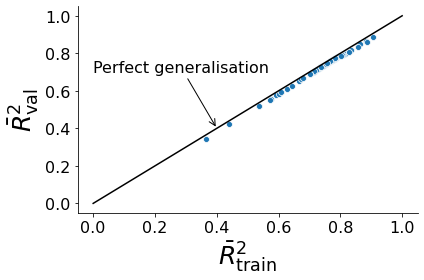

In [9]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='r2_adj_train', y='r2_adj_val', ax=ax)
ax.plot([0., 1.], [0., 1.], color='black')
ax.annotate(xy=(0.4, 0.4),
            xytext=(0.0, 0.7),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

## Relationship between $R^2$ and rel. error

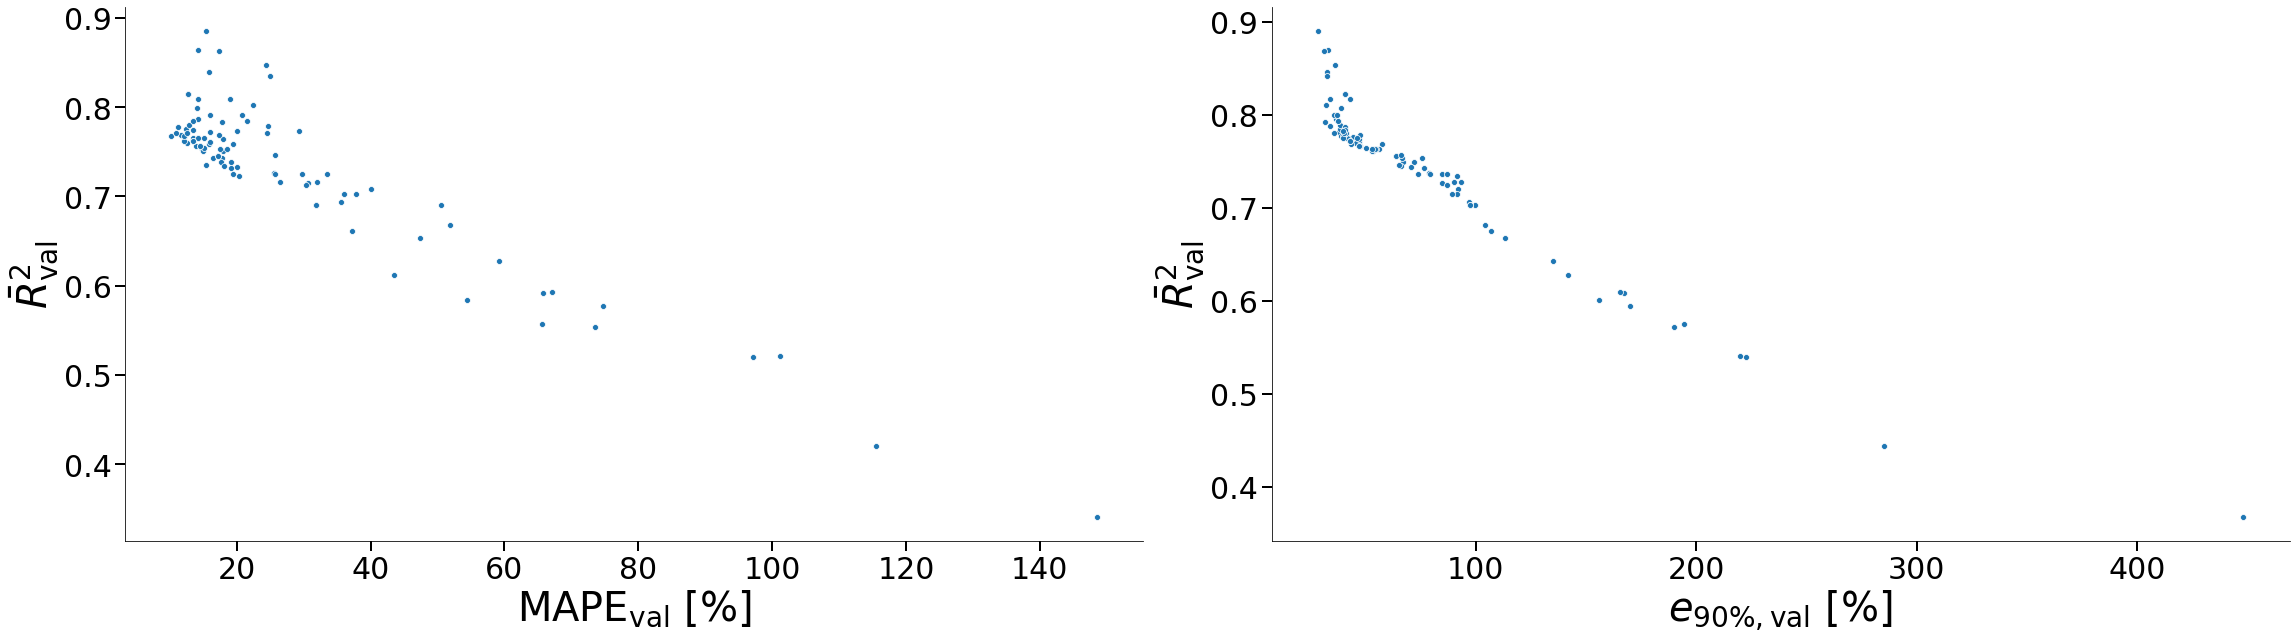

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(32, 9))

ax = axes[0]
sns.scatterplot(data=df, x='MAPE_val', y='r2_adj_val', ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\mathrm{MAPE}_\mathrm{val}$ [%]', fontsize=40)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=40)

ax = axes[1]
sns.scatterplot(data=df, x='90_percentile_max_error_val', y='r2_val', ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$e_\mathrm{90\%, val}$ [%]', fontsize=40)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=40)

for ax in axes:
    ax.tick_params(labelsize=30, width=2, length=10)

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_vs_rel_errors.jpg')

## Execution time vs. batch size

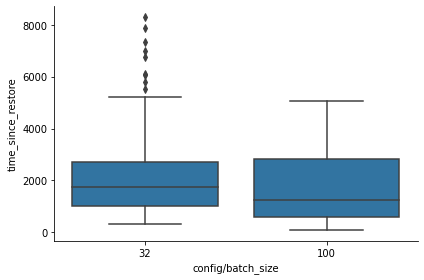

In [11]:
fig, ax = plt.subplots()

sns.boxplot(data=df, x='config/batch_size', y='time_since_restore', color=sns.color_palette()[0])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
fig.savefig(f'{plot_dir}/time_vs_batch_size')

## Dependence on the parameters

In [12]:
y_lim = [0.995, 1.005]
#y_lim = [0., 1.]

In [13]:
config_columns

['config/activation_function',
 'config/batch_size',
 'config/depth',
 'config/epochs',
 'config/learning_rate',
 'config/loss',
 'config/optimizer',
 'config/preprocessor_x',
 'config/preprocessor_y',
 'config/training_repetitions',
 'config/width',
 'config/x_noise']

In [14]:
to_plot = df[config_columns + ['r2_adj_val']].rename(columns=config_column_labels)

In [32]:
to_plot_ow =to_plot.copy()

In [33]:
to_plot_ow

config/activation_function  config/batch_size  config/depth  config/epochs  \
0                        relu                100             3             10   
1                        relu                 32             3             20   
2                        relu                 32             3             30   
3                        relu                 32             3             40   
4                        relu                100             3             50   
..                        ...                ...           ...            ...   
95                       relu                 32             3             60   
96                       relu                100             3             70   
97                       relu                100             3             80   
98                       relu                 32             3             90   
99                       relu                 32             3            100   

    config/learning_rate config/loss  \
0               0.000033         MSE   
1               0.000033         MSE   
2               0.000033         MSE   
3               0.000033         MSE   
4               0.000033         MSE   
..                   ...         ...   
95              0.000033         MSE   
96              0.000033         MSE   
97              0.000033         MSE   
98              0.000033         MSE   
99              0.000033         MSE   

                                     config/optimizer  \
0   <class 'tensorflow.python.keras.optimizer_v2.a...   
1   <class 'tensorflow.python.keras.optimizer_v2.a...   
2   <class 'tensorflow.python.keras.optimizer_v2.a...   
3   <class 'tensorflow.python.keras.optimizer_v2.a...   
4   <class 'tensorflow.python.keras.optimizer_v2.a...   
..                                                ...   
95  <class 'tensorflow.python.keras.optimizer_v2.a...   
96  <class 'tensorflow.python.keras.optimizer_v2.a...   
97  <class 'tensorflow.python.keras.optimizer_v2.a...   
98  <class 'tensorflow.python.keras.optimizer_v2.a...   
99  <class 'tensorflow.python.keras.optimizer_v2.a...   

                                config/preprocessor_x  \
0   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
1   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
2   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
3   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
4   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
..                                                ...   
95  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
96  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
97  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
98  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
99  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                                config/preprocessor_y  \
0   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
1   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
2   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
3   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
4   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
..                                                ...   
95  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
96  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
97  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
98  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
99  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

    config/training_repetitions  config/width  config/x_noise r2_adj_val  
0                             2           118           0.001   0.395393  
1                             2           118           0.001   0.504515  
2                             2           118           0.001   0.613365  
3                             2           118           0.001   0.613365  
4                             2           118           0.001   0.613365  
..                          ...           ..

/data/user/boiger_r/python_env/aerosol_env/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
/data/user/boiger_r/python_env/aerosol_env/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


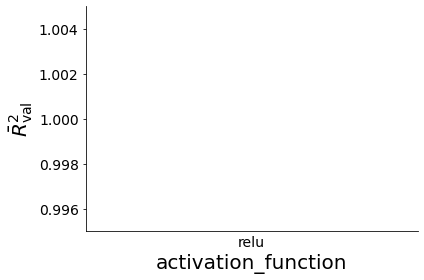

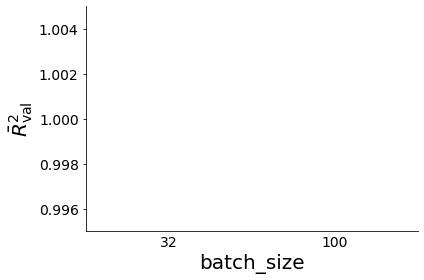

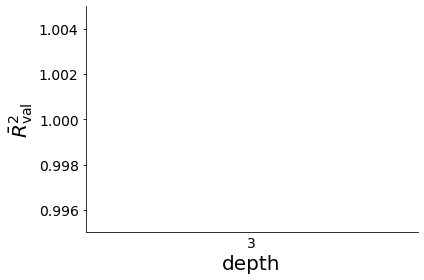

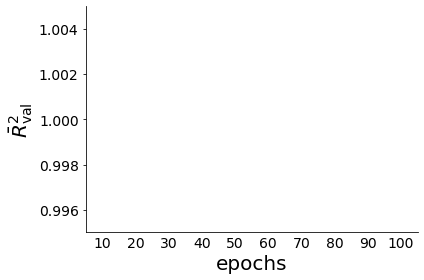

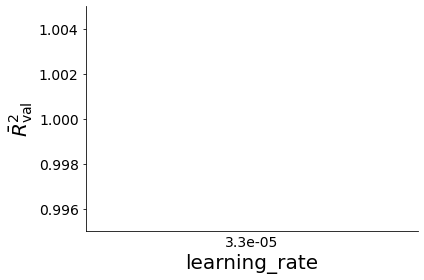

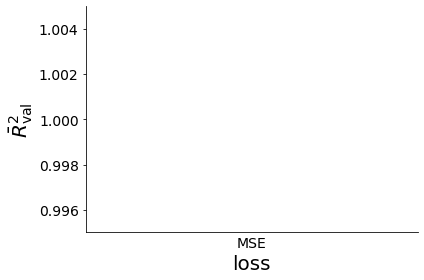

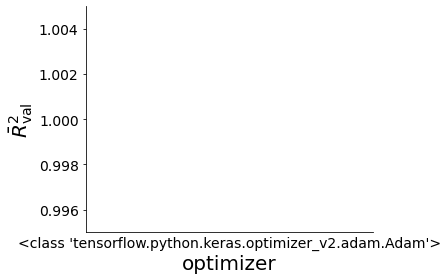

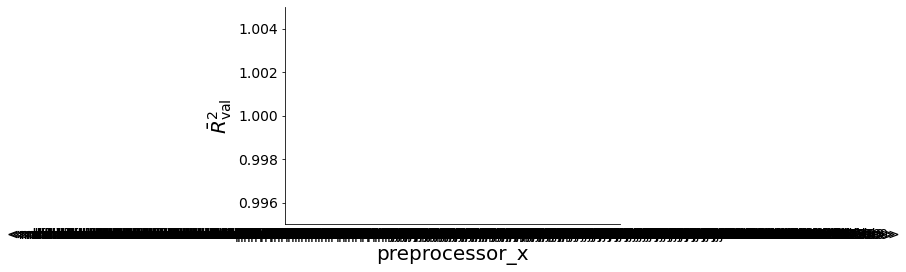

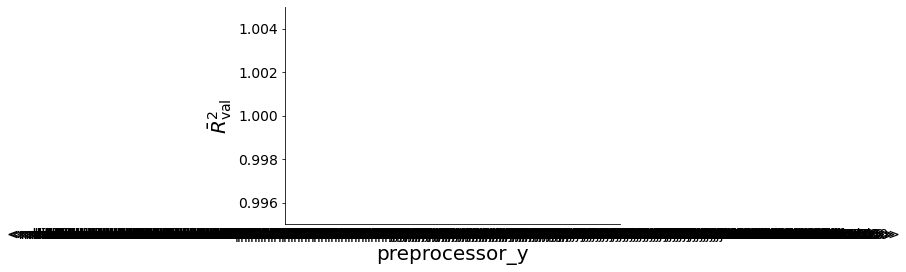

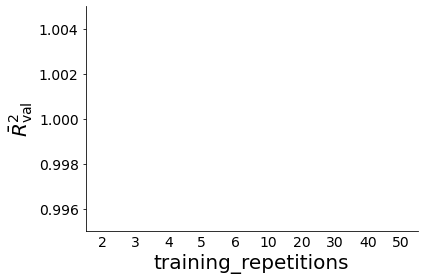

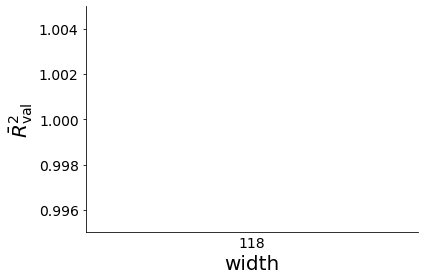

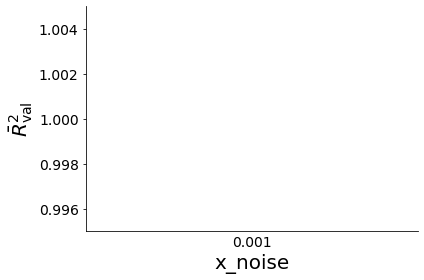

In [17]:
for param in to_plot.columns:
    if param == 'r2_adj_val':
        continue

    fig, ax = plt.subplots()

    sns.boxplot(data=to_plot, x=param, y='r2_adj_val', color=sns.color_palette()[0])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(y_lim)
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=20)
    ax.tick_params(labelsize=14)
    ax.tick_params(axis='x', length=0)
    #ax.grid(True, axis='y')
    
    fig.tight_layout()
    fig.savefig(f'{plot_dir}/dependence_on_{param}.jpg')

In [18]:
config_columns

['config/activation_function',
 'config/batch_size',
 'config/depth',
 'config/epochs',
 'config/learning_rate',
 'config/loss',
 'config/optimizer',
 'config/preprocessor_x',
 'config/preprocessor_y',
 'config/training_repetitions',
 'config/width',
 'config/x_noise']

In [19]:
df[config_columns + ['r2_adj_val']]

config/activation_function  config/batch_size  config/depth  config/epochs  \
0                        relu                100             3             10   
1                        relu                 32             3             20   
2                        relu                 32             3             30   
3                        relu                 32             3             40   
4                        relu                100             3             50   
..                        ...                ...           ...            ...   
95                       relu                 32             3             60   
96                       relu                100             3             70   
97                       relu                100             3             80   
98                       relu                 32             3             90   
99                       relu                 32             3            100   

    config/learning_rate config/loss  \
0               0.000033         MSE   
1               0.000033         MSE   
2               0.000033         MSE   
3               0.000033         MSE   
4               0.000033         MSE   
..                   ...         ...   
95              0.000033         MSE   
96              0.000033         MSE   
97              0.000033         MSE   
98              0.000033         MSE   
99              0.000033         MSE   

                                     config/optimizer  \
0   <class 'tensorflow.python.keras.optimizer_v2.a...   
1   <class 'tensorflow.python.keras.optimizer_v2.a...   
2   <class 'tensorflow.python.keras.optimizer_v2.a...   
3   <class 'tensorflow.python.keras.optimizer_v2.a...   
4   <class 'tensorflow.python.keras.optimizer_v2.a...   
..                                                ...   
95  <class 'tensorflow.python.keras.optimizer_v2.a...   
96  <class 'tensorflow.python.keras.optimizer_v2.a...   
97  <class 'tensorflow.python.keras.optimizer_v2.a...   
98  <class 'tensorflow.python.keras.optimizer_v2.a...   
99  <class 'tensorflow.python.keras.optimizer_v2.a...   

                                config/preprocessor_x  \
0   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
1   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
2   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
3   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
4   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
..                                                ...   
95  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
96  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
97  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
98  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
99  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                                config/preprocessor_y  \
0   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
1   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
2   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
3   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
4   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
..                                                ...   
95  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
96  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
97  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
98  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
99  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

    config/training_repetitions  config/width  config/x_noise  r2_adj_val  
0                             2           118           0.001    0.341241  
1                             2           118           0.001    0.557157  
2                             2           118           0.001    0.612029  
3                             2           118           0.001    0.653671  
4                             2           118           0.001    0.591414  
..                          ...       

In [20]:
#g = sns.pairplot(data=df[config_columns + ['r2_adj_val']], hue='r2_adj_val', diag_kind='hist', corner=True)

In [21]:
len(config_columns)

12

In [22]:
len(config_column_labels)

12

In [23]:
to_plot = df[config_columns + ['r2_adj_val']].copy()
to_plot['r2_adj_val'], bins = pd.cut(df['r2_adj_val'], 5, retbins=True)
mean_points = [(bins[i] + bins[i-1]) / 2. for i in range(1, len(bins))]
to_plot['r2_adj_val'] = pd.cut(df['r2_adj_val'], 5, retbins=False, labels=mean_points)

In [24]:
to_plot['r2_adj_val']


/psi/home/boiger_r/.local/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0     0.395393
1     0.504515
2     0.613365
3     0.613365
4     0.613365
        ...   
95    0.831064
96    0.831064
97    0.831064
98    0.831064
99    0.831064
Name: r2_adj_val, Length: 100, dtype: category
Categories (5, float64): [0.395393 < 0.504515 < 0.613365 < 0.722214 < 0.831064]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


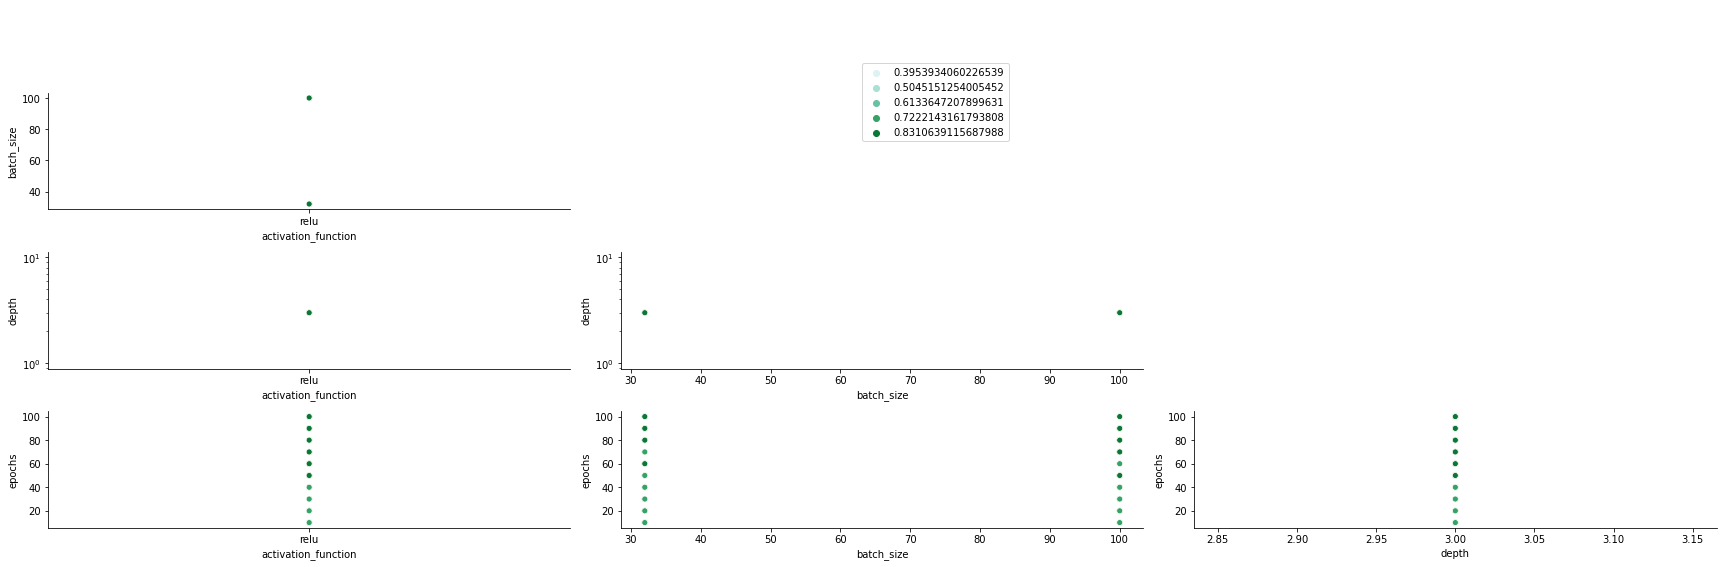

In [25]:
n_row = 4
n_col = 4
cols = config_columns

colors = sns.color_palette("BuGn_r", n_colors=len(to_plot['r2_adj_val'].unique()))
colors.reverse()

fig, axes = plt.subplots(n_row, n_col, figsize=(32, 9))
legend = True

for i in range(n_row):
    for j in range(n_col):
        ax = axes[i, j]
        if j >= i:
            ax.remove()
            continue
        sns.scatterplot(data=to_plot,
                        x=cols[j],
                        y=cols[i],
                        hue=to_plot['r2_adj_val'].tolist(),
                        palette=colors,
                        legend='brief' if legend else False,
                        ax=ax)
        if legend:
            legend = False

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel(config_column_labels[config_columns[j]])
        ax.set_ylabel(config_column_labels[config_columns[i]])
        ax.legend().remove()
fig.tight_layout()
fig.legend(loc=(0.5, 0.75))

axes[2, 0].set_yscale('log')
axes[2, 1].set_yscale('log')

# Best configs

In [26]:
best_config = df.sort_values('r2_val', ascending=False).iloc[0, :]

In [27]:
df.sort_values('r2_val', ascending=False)[config_columns + ['r2_adj_val', 'MAPE_val', 'median_percentile_max_error_val', '90_percentile_max_error_val','r2_val']].rename(columns=config_column_labels).head(20)

activation_function  batch_size  depth  epochs  learning_rate loss  \
99                relu          32      3     100       0.000033  MSE   
87                relu          32      3      80       0.000033  MSE   
98                relu          32      3      90       0.000033  MSE   
79                relu          32      3     100       0.000033  MSE   
77                relu          32      3      80       0.000033  MSE   
88                relu          32      3      90       0.000033  MSE   
85                relu          32      3      60       0.000033  MSE   
95                relu          32      3      60       0.000033  MSE   
96                relu         100      3      70       0.000033  MSE   
89                relu         100      3     100       0.000033  MSE   
69                relu          32      3     100       0.000033  MSE   
75                relu          32      3      60       0.000033  MSE   
86                relu         100      3      70       0.000033  MSE   
94                relu         100      3      50       0.000033  MSE   
78                relu         100      3      90       0.000033  MSE   
97                relu         100      3      80       0.000033  MSE   
84                relu         100      3      50       0.000033  MSE   
76                relu         100      3      70       0.000033  MSE   
67                relu         100      3      80       0.000033  MSE   
59                relu          32      3     100       0.000033  MSE   

                                            optimizer  \
99  <class 'tensorflow.python.keras.optimizer_v2.a...   
87  <class 'tensorflow.python.keras.optimizer_v2.a...   
98  <class 'tensorflow.python.keras.optimizer_v2.a...   
79  <class 'tensorflow.python.keras.optimizer_v2.a...   
77  <class 'tensorflow.python.keras.optimizer_v2.a...   
88  <class 'tensorflow.python.keras.optimizer_v2.a...   
85  <class 'tensorflow.python.keras.optimizer_v2.a...   
95  <class 'tensorflow.python.keras.optimizer_v2.a...   
96  <class 'tensorflow.python.keras.optimizer_v2.a...   
89  <class 'tensorflow.python.keras.optimizer_v2.a...   
69  <class 'tensorflow.python.keras.optimizer_v2.a...   
75  <class 'tensorflow.python.keras.optimizer_v2.a...   
86  <class 'tensorflow.python.keras.optimizer_v2.a...   
94  <class 'tensorflow.python.keras.optimizer_v2.a...   
78  <class 'tensorflow.python.keras.optimizer_v2.a...   
97  <class 'tensorflow.python.keras.optimizer_v2.a...   
84  <class 'tensorflow.python.keras.optimizer_v2.a...   
76  <class 'tensorflow.python.keras.optimizer_v2.a...   
67  <class 'tensorflow.python.keras.optimizer_v2.a...   
59  <class 'tensorflow.python.keras.optimizer_v2.a...   

                                       preprocessor_x  \
99  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
87  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
98  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
79  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
77  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
88  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
85  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
95  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
96  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
89  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
69  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
75  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
86  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
94  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
78  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
97  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
84  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
76  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
67  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
59  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                                       preprocessor_y  training_repetitio

In [28]:
best_config.name

99

In [29]:
best_config['trial_id']

'2b894_00099'

# Worst configs

In [30]:
df.sort_values('r2_adj_val', ascending=True)[config_columns + ['r2_adj_val', 'MAPE_val', 'median_percentile_max_error_val', '90_percentile_max_error_val']].rename(columns=config_column_labels).head(5)

batch_size  depth     lr  width  r2_adj_val    MAPE_val  \
2         128      3  0.001      5    0.191498  147.637607   
0          32      3  0.001      5    0.191569  147.625089   
7          64      5  0.001      5    0.253537  102.603079   
5         128      4  0.001      5    0.253954  104.005917   
3          32      4  0.001      5    0.254289  103.092361   

   median_percentile_max_error_val  90_percentile_max_error_val  
2                        77.801767                   891.037397  
0                        77.825458                   891.799551  
7                        56.890023                   610.014381  
5                        58.061525                   636.196033  
3                        57.689007                   628.517628

In [31]:
df

MAE_train     MAE_val  MAPE_train    MAPE_val      MSE_train  \
0   249.821977  249.144011  139.282994  147.625089  416090.637703   
1    66.124183   66.157258   87.464126   91.692534   35570.761481   
2   249.807422  249.140029  139.298567  147.637607  416049.375834   
3   133.315936  133.145609  100.048972  103.092361  187382.675161   
4   131.890952  131.848739  100.063536  103.036689  186452.553130   
5   133.858593  134.043871  100.989339  104.005917  190911.250785   
6   132.226824  132.159229  100.079355  103.218759  187193.602612   
7   125.814493  126.235441   96.376519  102.603079  173479.193132   
8   132.941180  133.057206  100.015271  103.331535  189611.809560   
9    79.444385   79.425443   84.251795   89.381089   53484.824865   
10   65.746734   65.329607   80.830217   84.860623   45175.262111   
11   73.499854   73.686614   76.892555   81.726436   52617.567391   
12   72.818275   73.280167   73.615585   77.068458   45507.685077   
13   67.068712   67.046340   83.602156   87.285255   37881.633781   
14   67.474781   67.565809   83.300865   86.889831   38062.854834   
15   62.832051   62.575290   79.334156   83.273353   36781.619795   
16   82.269801   82.261560   78.331672   81.385418   62229.456394   
17   79.799169   79.506180   81.094390   84.672735   59294.837235   
18   29.384447   29.055651   47.125713   46.950219    8878.802900   
19   25.202723   25.312089   45.357991   45.788953    7216.861647   
20   29.825133   29.864504   42.450896   42.785709    8916.914404   
21   86.479781   85.884965   64.737004   66.655660   82560.840976   
22   89.085574   87.988024   67.151281   69.793821   75790.344027   
23   86.366358   85.675603   67.973096   70.100135   87213.296675   
24   86.089672   85.286177   62.904591   64.205502   88709.109029   
25   88.848786   87.982180   63.871991   65.389782   91569.652277   
26   85.085786   84.413891   65.011566   66.769328   83166.940643   
27   24.314682   24.122288   16.162719   18.791333    6165.312776   
28   24.928259   24.716721   15.699871   16.938803    6403.466672   
29   33.656726   33.576400   20.293863   22.403224   12514.418333   
30   21.067032   20.824082   13.773616   15.061015    4883.095298   
31   28.127043   27.853158   14.465502   15.276723    8042.692579   
32   30.226142   30.209261   23.220392   25.944134    7975.459735   
33   25.483124   25.202609   13.044110   14.995854    6234.022921   
34   24.381791   23.973134   15.095266   16.721772    5925.788241   
35   25.137322   24.877931   12.140053   12.774922    6020.361651   
36   19.623079   19.623970   10.376132   11.688572    3843.606260   
37   22.375356   22.419793   12.582188   13.426450    4639.630546   
38   26.664698   26.417872   16.580516   18.477598    6288.008629   
39   18.339386   18.333366    9.811934   10.491652    3525.653234   
40   20.123347   20.095889   11.493380   12.473135    3902.181039   
41   22.165992   22.119394   11.949156   13.743786    4500.007686   
42   15.172133   14.920312    8.947966    9.720237    2318.650654   
43   17.623767   17.581008   10.362146   10.928503    3193.553686   
44   26.680928   26.462026    8.559108    8.999117    5861.589905   
45   37.535534   37.098027   13.716846   14.851563   11370.470084   
46   21.975068   21.799349   14.608774   16.202020    4793.768593   
47   21.623863   21.725799   14.155293   14.942692    4583.770952   
48   17.789643   17.552377   10.746635   12.079507    3454.076669   
49   17.603428   17.343793   10.659595   11.472393    3336.090547   
50   17.374085   17.242719   10.168584   11.750781    3163.500917   
51   16.928143   16.873345    9.863948   11.104467    2828.284967   
52   20.119172   20.024805   10.959633   13.131002    3732.382654   
53   32.738842   32.599195   10.882672   12.381880    8763.744463   

          MSE_val  median_percentile_max_error_train  \
0   414013.283662                          77.561663   
1    35644.600247                          58.019968   
2   413998.502404                        

# Copy the best model to the models directory

In [36]:
best_model_dir = f'{best_config["logdir"]}/surrogate_model'

In [37]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/results_data_MP/trial1_0/models'

In [38]:
shutil.copytree(best_model_dir, f'{model_dir}/forward_model')

'/data/project/general/aerosolretriev/aerosol_results_rb/results_data_MP/trial1_0/models/forward_model'

# Closer look w. r. t. overfitting

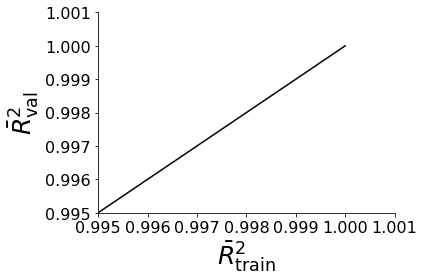

In [39]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='r2_adj_train', y='r2_adj_val', ax=ax)
ax.plot([0., 1.], [0., 1.], color='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0.995, 1.001])
ax.set_ylim([0.995, 1.001])

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

In [40]:
df[df['r2_adj_train'] > 0.95]

Empty DataFrame
Columns: [MAE_train, MAE_val, MAPE_train, MAPE_val, MSE_train, MSE_val, median_percentile_max_error_train, median_percentile_max_error_val, 90_percentile_max_error_train, 90_percentile_max_error_val, r2_train, r2_val, r2_adj_train, r2_adj_val, time_this_iter_s, done, timesteps_total, episodes_total, training_iteration, experiment_id, date, timestamp, time_total_s, pid, hostname, node_ip, time_since_restore, timesteps_since_restore, iterations_since_restore, trial_id, config/activation_function, config/batch_size, config/datafile, config/depth, config/epochs, config/learning_rate, config/loss, config/optimizer, config/preprocessor_x, config/preprocessor_y, config/training_repetitions, config/width, config/x_noise, logdir]
Index: []

[0 rows x 44 columns]

In [41]:
# LOad history of best config

In [42]:
best_model_folder = best_config['trial_id']

In [43]:
result_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/results_data_MP/trial1_0'

In [44]:
best_model_hist = pd.read_csv(f'{result_dir}/histories/{best_model_folder}.csv', index_col=0)

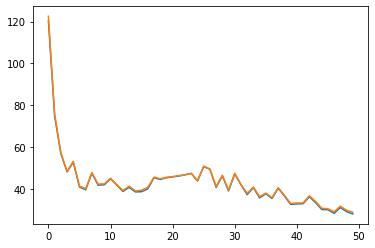

In [45]:
plt.plot(best_model_hist['MAE_train'])
plt.plot(best_model_hist['MAE_val'])

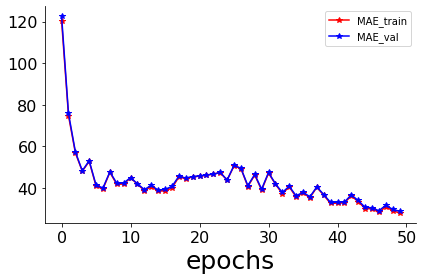

In [46]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['MAE_train'],'r*-', label = 'MAE_train')
ax.plot(best_model_hist['MAE_val'],'b*-',label =  'MAE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()


In [47]:
best_model_hist.keys()

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'time_this_iter_s', 'done', 'timesteps_total',
       'episodes_total', 'training_iteration', 'experiment_id', 'date',
       'timestamp', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id'],
      dtype='object')

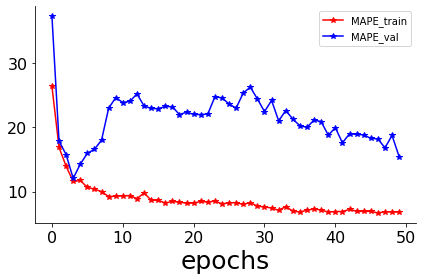

In [48]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['MAPE_train'],'r*-', label = 'MAPE_train')
ax.plot(best_model_hist['MAPE_val'],'b*-',label =  'MAPE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

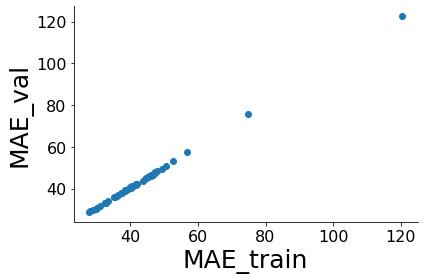

In [49]:
fig, ax = plt.subplots()


ax.scatter(best_model_hist['MAE_train'],best_model_hist['MAE_val'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('MAE_train', fontsize=25)
ax.set_ylabel('MAE_val', fontsize=25)

ax.tick_params(labelsize=16)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

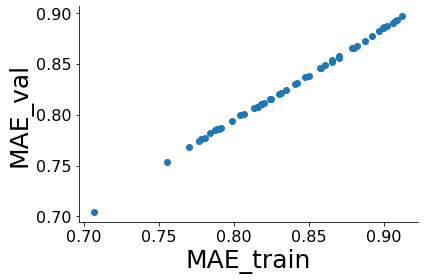

In [50]:
fig, ax = plt.subplots()


ax.scatter(best_model_hist['r2_train'],best_model_hist['r2_val'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('MAE_train', fontsize=25)
ax.set_ylabel('MAE_val', fontsize=25)

ax.tick_params(labelsize=16)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

In [51]:
to_plot

config/activation_function  config/batch_size  config/depth  config/epochs  \
0                        relu                100             3             10   
1                        relu                 32             3             20   
2                        relu                 32             3             30   
3                        relu                 32             3             40   
4                        relu                100             3             50   
..                        ...                ...           ...            ...   
95                       relu                 32             3             60   
96                       relu                100             3             70   
97                       relu                100             3             80   
98                       relu                 32             3             90   
99                       relu                 32             3            100   

    config/learning_rate config/loss  \
0               0.000033         MSE   
1               0.000033         MSE   
2               0.000033         MSE   
3               0.000033         MSE   
4               0.000033         MSE   
..                   ...         ...   
95              0.000033         MSE   
96              0.000033         MSE   
97              0.000033         MSE   
98              0.000033         MSE   
99              0.000033         MSE   

                                     config/optimizer  \
0   <class 'tensorflow.python.keras.optimizer_v2.a...   
1   <class 'tensorflow.python.keras.optimizer_v2.a...   
2   <class 'tensorflow.python.keras.optimizer_v2.a...   
3   <class 'tensorflow.python.keras.optimizer_v2.a...   
4   <class 'tensorflow.python.keras.optimizer_v2.a...   
..                                                ...   
95  <class 'tensorflow.python.keras.optimizer_v2.a...   
96  <class 'tensorflow.python.keras.optimizer_v2.a...   
97  <class 'tensorflow.python.keras.optimizer_v2.a...   
98  <class 'tensorflow.python.keras.optimizer_v2.a...   
99  <class 'tensorflow.python.keras.optimizer_v2.a...   

                                config/preprocessor_x  \
0   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
1   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
2   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
3   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
4   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
..                                                ...   
95  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
96  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
97  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
98  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
99  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                                config/preprocessor_y  \
0   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
1   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
2   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
3   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
4   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
..                                                ...   
95  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
96  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
97  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
98  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
99  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

    config/training_repetitions  config/width  config/x_noise r2_adj_val  
0                             2           118           0.001   0.395393  
1                             2           118           0.001   0.504515  
2                             2           118           0.001   0.613365  
3                             2           118           0.001   0.613365  
4                             2           118           0.001   0.613365  
..                          ...           ..

In [52]:
to_plot_ow.columns

Index(['config/activation_function', 'config/batch_size', 'config/depth',
       'config/epochs', 'config/learning_rate', 'config/loss',
       'config/optimizer', 'config/preprocessor_x', 'config/preprocessor_y',
       'config/training_repetitions', 'config/width', 'config/x_noise',
       'r2_adj_val'],
      dtype='object')

# create overview plot

In [53]:
best_config

MAE_train                                                                    27.905289
MAE_val                                                                      28.738949
MAPE_train                                                                    6.838842
MAPE_val                                                                     15.446277
MSE_train                                                                  4745.581243
MSE_val                                                                    5104.341971
median_percentile_max_error_train                                              7.15608
median_percentile_max_error_val                                               7.153472
90_percentile_max_error_train                                                29.419115
90_percentile_max_error_val                                                   28.42451
r2_train                                                                      0.906151
r2_val                                     

KeyError: 'config/lr'

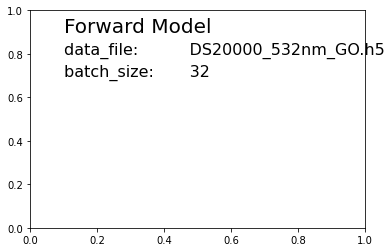

In [54]:
fig, ax = plt.subplots()

ax.annotate(xy=(1, 1),xytext=(0.1, 0.9),text='Forward Model',fontsize=20)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.8),text='data_file:          ' +os.path.basename(best_config['config/datafile']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.7),text='batch_size:       ' +str(best_config['config/batch_size']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.6),text='learning_rate:  '+str(best_config['config/lr']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.5),text='depth:              '+str(best_config['config/depth']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.4),text='width:              '+str(best_config['config/width']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.3),text='epochs:            '+str(best_config['iterations_since_restore']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.2),text='r2_adj_train:    '+str(np.round(best_config['r2_adj_train'],3)),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.1),text='r2_adj_val:       '+str(np.round(best_config['r2_adj_val'],3)),fontsize=16)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

fig.tight_layout()
fig.savefig(f'{plot_dir}/forward_model_description.jpg',bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(30, 30))

ax= axes[0,0]
sns.scatterplot(data=df, x='r2_adj_train', y='r2_adj_val', ax=ax)
ax.plot([-1.5, 1.], [-1.5, 1.], color='black')
ax.annotate(xy=(0.8, 0.8),
            xytext=(0.1, 0.8),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0, 1.])
ax.set_ylim([0, 1.])


ax = axes[0,1]
ax.plot(best_model_hist['MAE_train'],'r*-', label = 'MAE_train')
ax.plot(best_model_hist['MAE_val'],'b*-',label =  'MAE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()

ax = axes[0,2]

ax.plot(best_model_hist['r2_adj_train'],'r*-', label = 'r2_adj train')
ax.plot(best_model_hist['r2_adj_val'],'b*-',label =  'r2_adj val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()


axeslist= [[1,0],[1,1],[1,2],[2,0],[2,1]]
i = 0

plot_columns_list = ['batch_size', 'depth', 'lr', 'width']

for param in plot_columns_list:
    if param == 'r2_adj_val':
        continue
    ax = axes[axeslist[i][0],axeslist[i][1]]
    print(axeslist[i][0],axeslist[i][1])
    i = i+1
    sns.boxplot(x=param, y='r2_adj_val',data=to_plot_ow, color=sns.color_palette()[0],ax=ax)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
 #   ax.set_ylim([0,1])
 #   ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=20)
    ax.tick_params(labelsize=14)
    ax.tick_params(axis='x', length=0)



ax = axes[2,2]

sns.boxplot(data=df, x='config/batch_size', y='time_since_restore', color=sns.color_palette()[0],ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()


fig.savefig(f'{plot_dir}/hyperparameter_scan_overview.jpg',bbox_inches='tight')

# Save configurations of best model

In [35]:
best_config_df = pd.DataFrame(best_config)

In [36]:
best_config_df = best_config_df.T
best_config_df

MAE_train    MAE_val MAPE_train  MAPE_val    MSE_train      MSE_val  \
42  15.172133  14.920312   8.947966  9.720237  2318.650654  2250.387972   

   median_percentile_max_error_train median_percentile_max_error_val  \
42                          8.343833                         8.32442   

   90_percentile_max_error_train 90_percentile_max_error_val  ...  \
42                     38.358875                   37.383017  ...   

   timesteps_since_restore iterations_since_restore     trial_id  \
42                       0                       50  f082a_00042   

                                experiment_tag config/batch_size  \
42  42_batch_size=32,depth=5,lr=0.001,width=20                32   

                                      config/datafile config/depth config/lr  \
42  /data/user/boiger_r/aerosol/aerosol_data/raw_d...            5     0.001   

   config/width                                             logdir  
42           20  /data/user/boiger_r/aerosol/aerosol_results/si...  

[1 rows x 37 columns]

In [37]:
best_config_df.columns

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'time_this_iter_s', 'done', 'timesteps_total',
       'episodes_total', 'training_iteration', 'experiment_id', 'date',
       'timestamp', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id', 'experiment_tag',
       'config/batch_size', 'config/datafile', 'config/depth', 'config/lr',
       'config/width', 'logdir'],
      dtype='object')

In [38]:
best_config_df.to_csv(f'{model_dir}/configs.csv')

In [55]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/results_data_MP/trial1_0/models'